<a href="https://colab.research.google.com/github/rkaur050/Cryptify/blob/main/diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Importing the dependencies

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE


#### Loading Dataset

In [84]:
df=pd.read_csv('/content/diabetes.csv')

In [85]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [86]:
#total no. of rows and columns in dataset
df.shape

(768, 9)

#### Exploratory Data Analysis

In [87]:
#checking for missing values
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [88]:
#analyzing dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [89]:
#statistical information of dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [90]:
#no. of diabetic and non-diabetic individuals
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [91]:
#Average differences in feature values between diabetic and non-diabetic individuals.
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


*It is highly unlikely that Glucose,BloodPressure,SkinThickness,Insulin and BMI levels are 0 for a person.So, we need to correct the data.*

##### Data Imputation

*   Mean : It is preferred if data is numeric and not skewed.
*   Median : It is preferred if data
is numeric and skewed.
*   Mode : It is preferred if the data is a categorical.









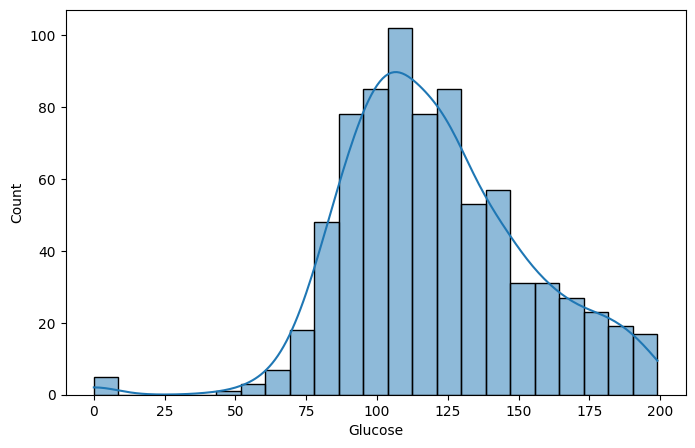

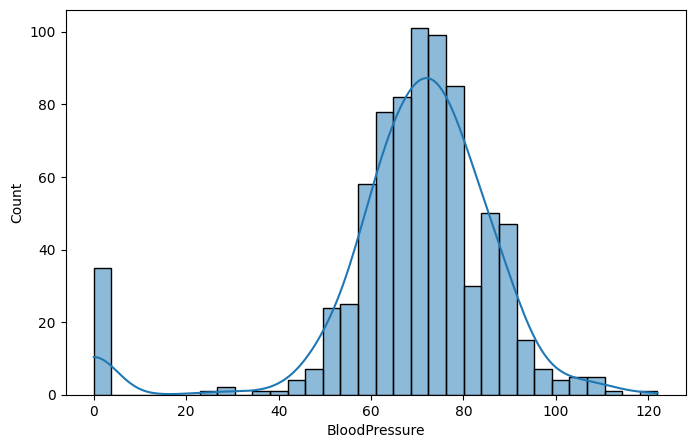

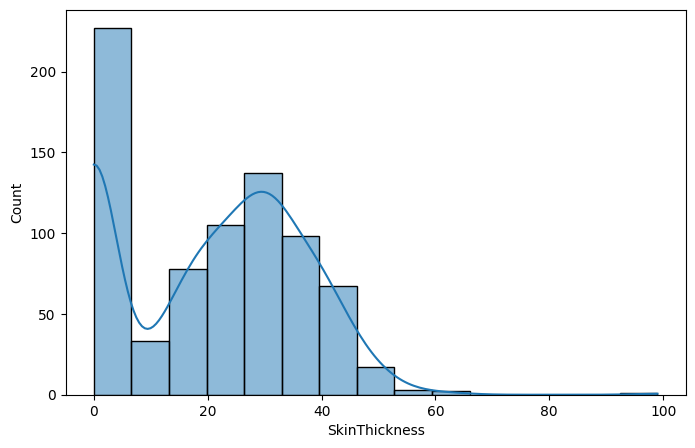

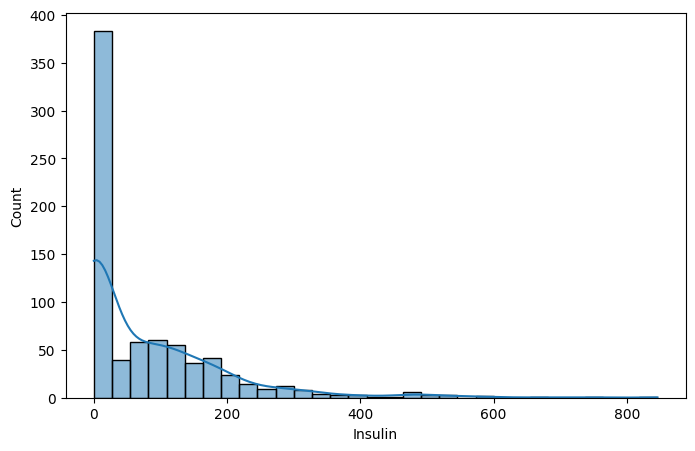

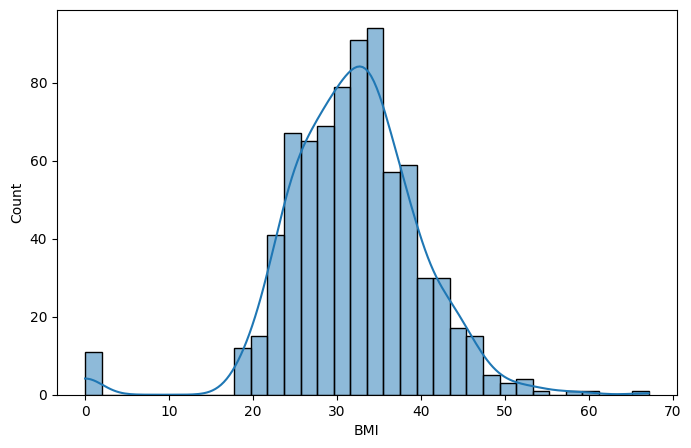

In [92]:
cols=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in cols:
  plt.figure(figsize=(8, 5))
  sns.histplot(df[i],kde=True)
  plt.show()

In [93]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())


In [94]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29,30.5,26.6,0.351,31,0
2,8,183.0,64.0,23,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35,168.0,43.1,2.288,33,1


##### Correlation of data


* Measure of linear relationship between two variables.It quantifies how one variable changes in relation to another.

*   Multi-collinearity occurs when two or more variables in a dataset are highly corelated.

*   Removing one of the highly correlated variables reduces redundancy, improves model stability, and increases interpretability.






In [95]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.172361,0.357081,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.152458,-0.022049,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.032568,0.172361,0.152458,1.000000,0.238188,0.546958,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357081,-0.022049,0.238188,1.000000,0.189031,0.178029,-0.015413,0.148457
BMI,0.021546,0.231478,0.281231,0.546958,0.189031,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.142977,0.178029,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.054514,-0.015413,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.189065,0.148457,0.312254,0.173844,0.238356,1.000000


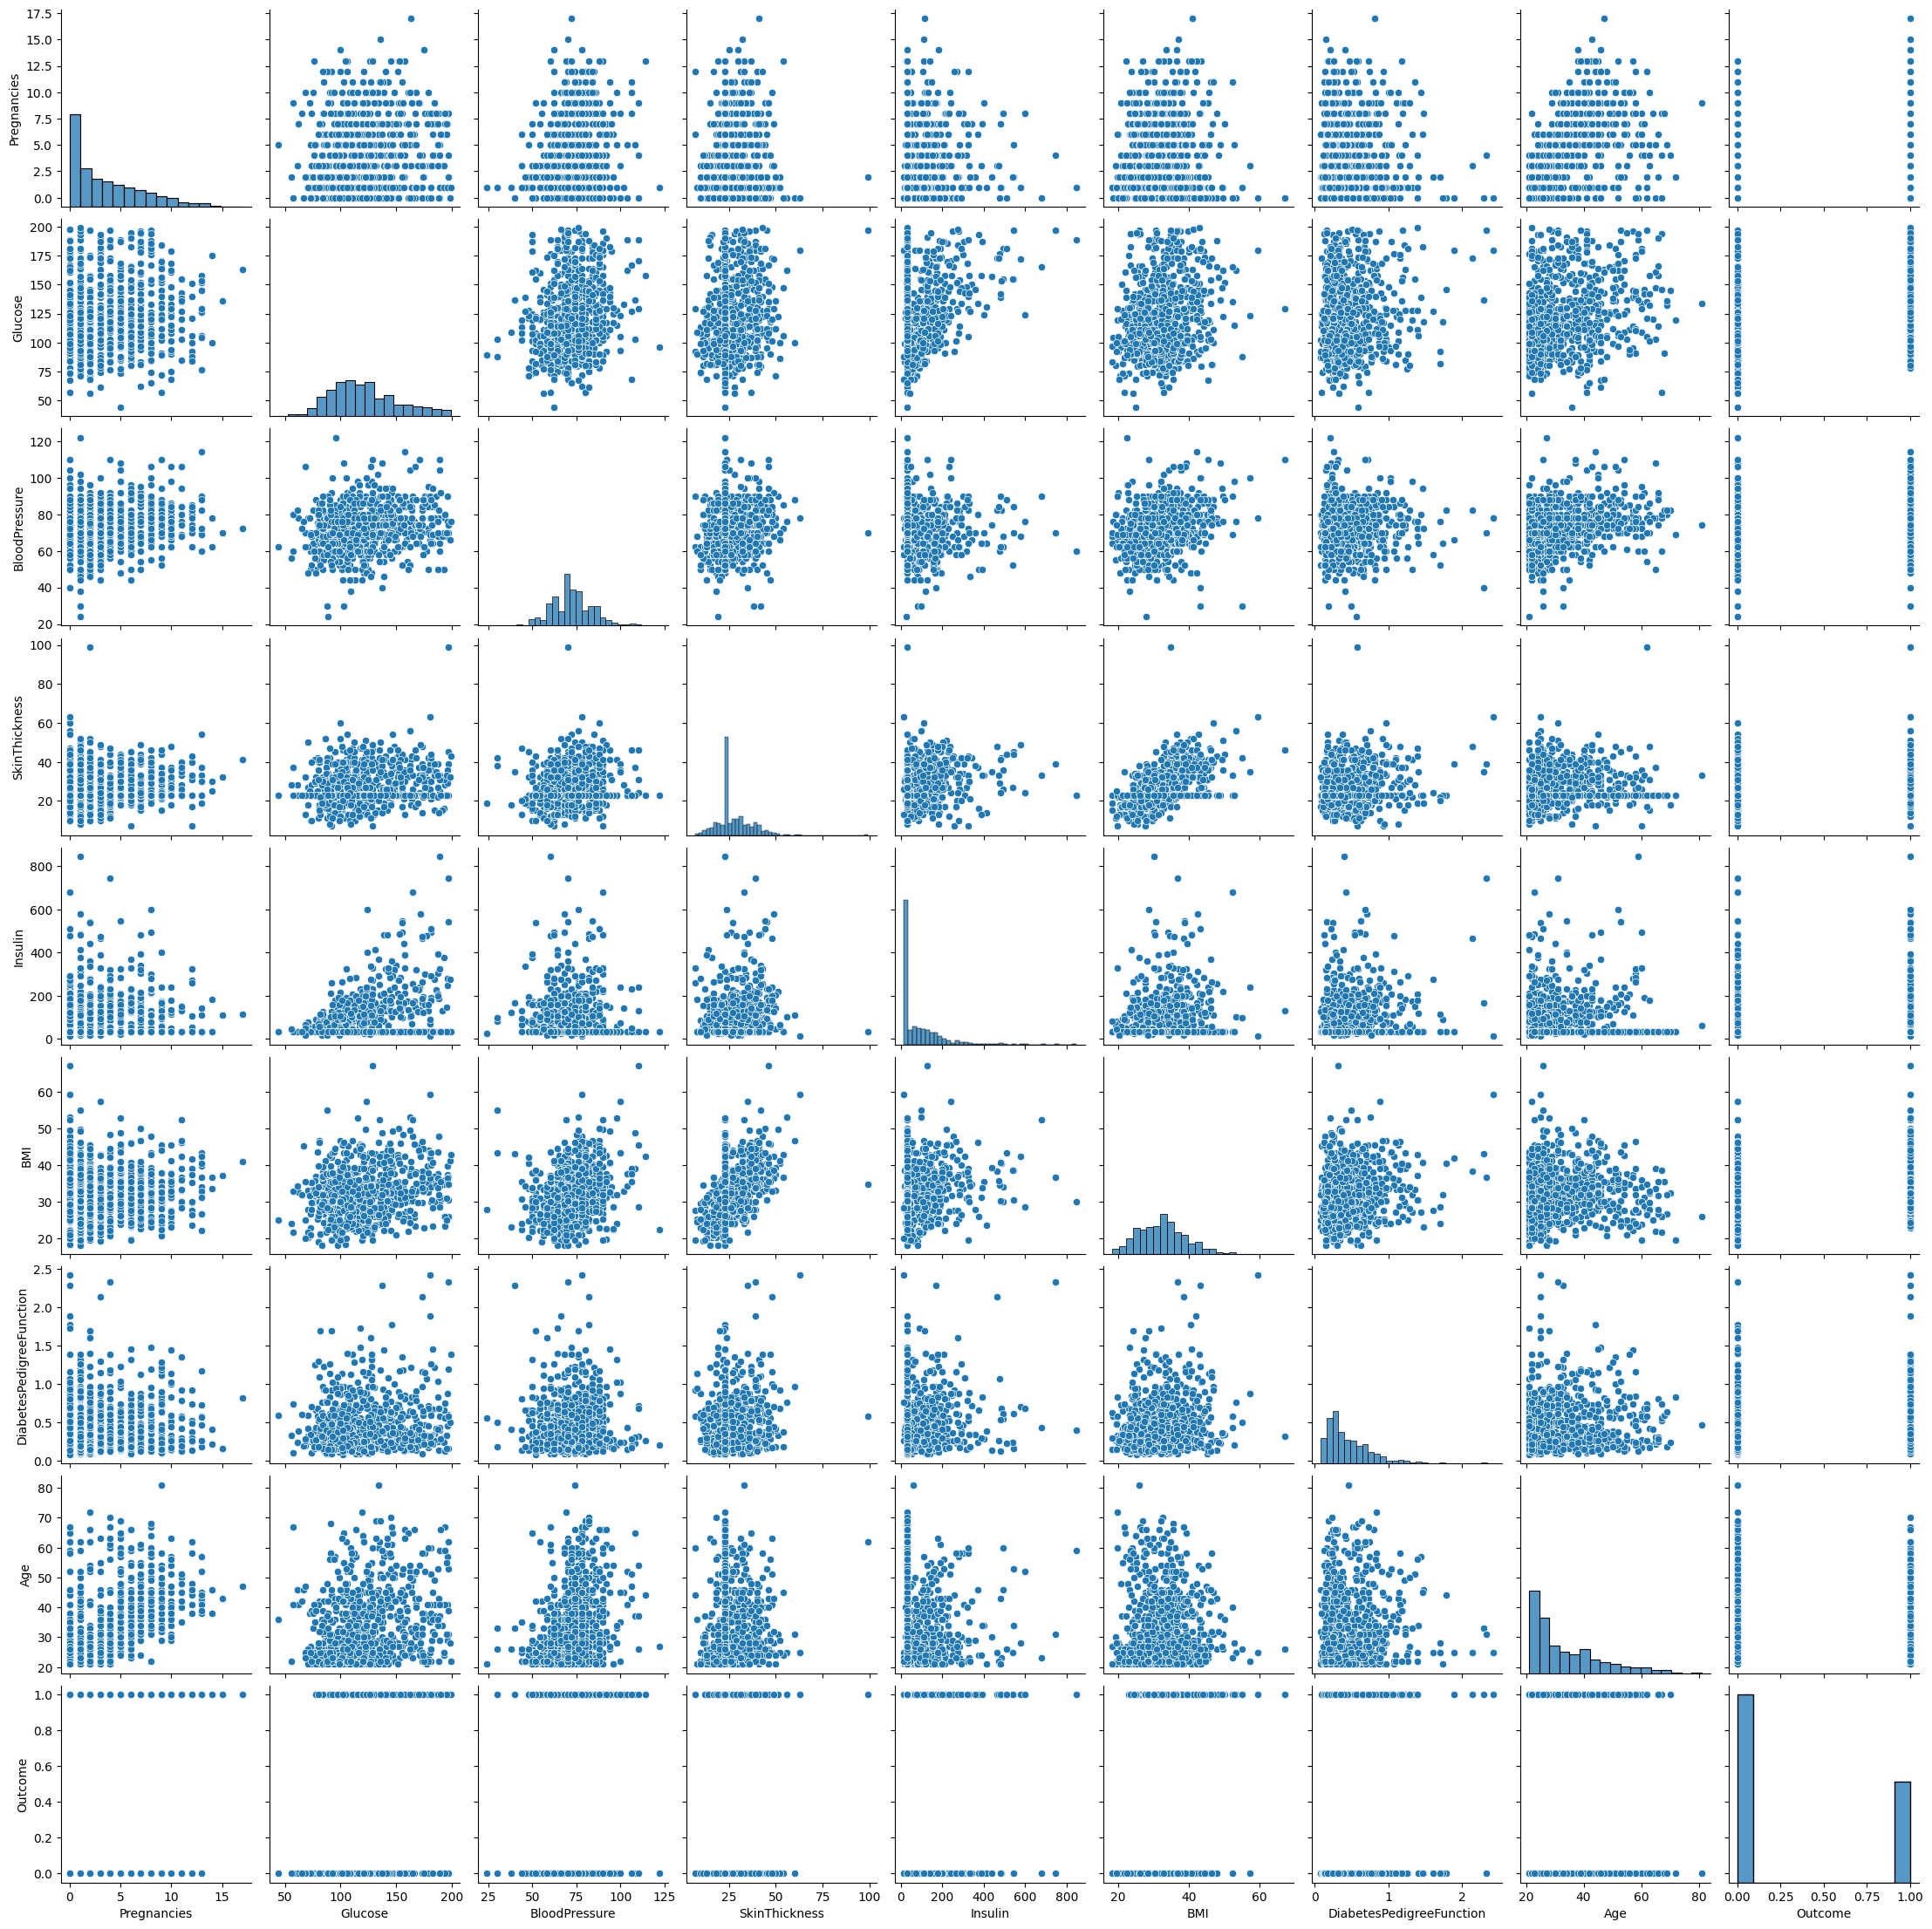

In [96]:
sns.pairplot(df)

#### Data Splitting into input features and target variable

In [97]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

#### Outlier Detection

<Axes: >

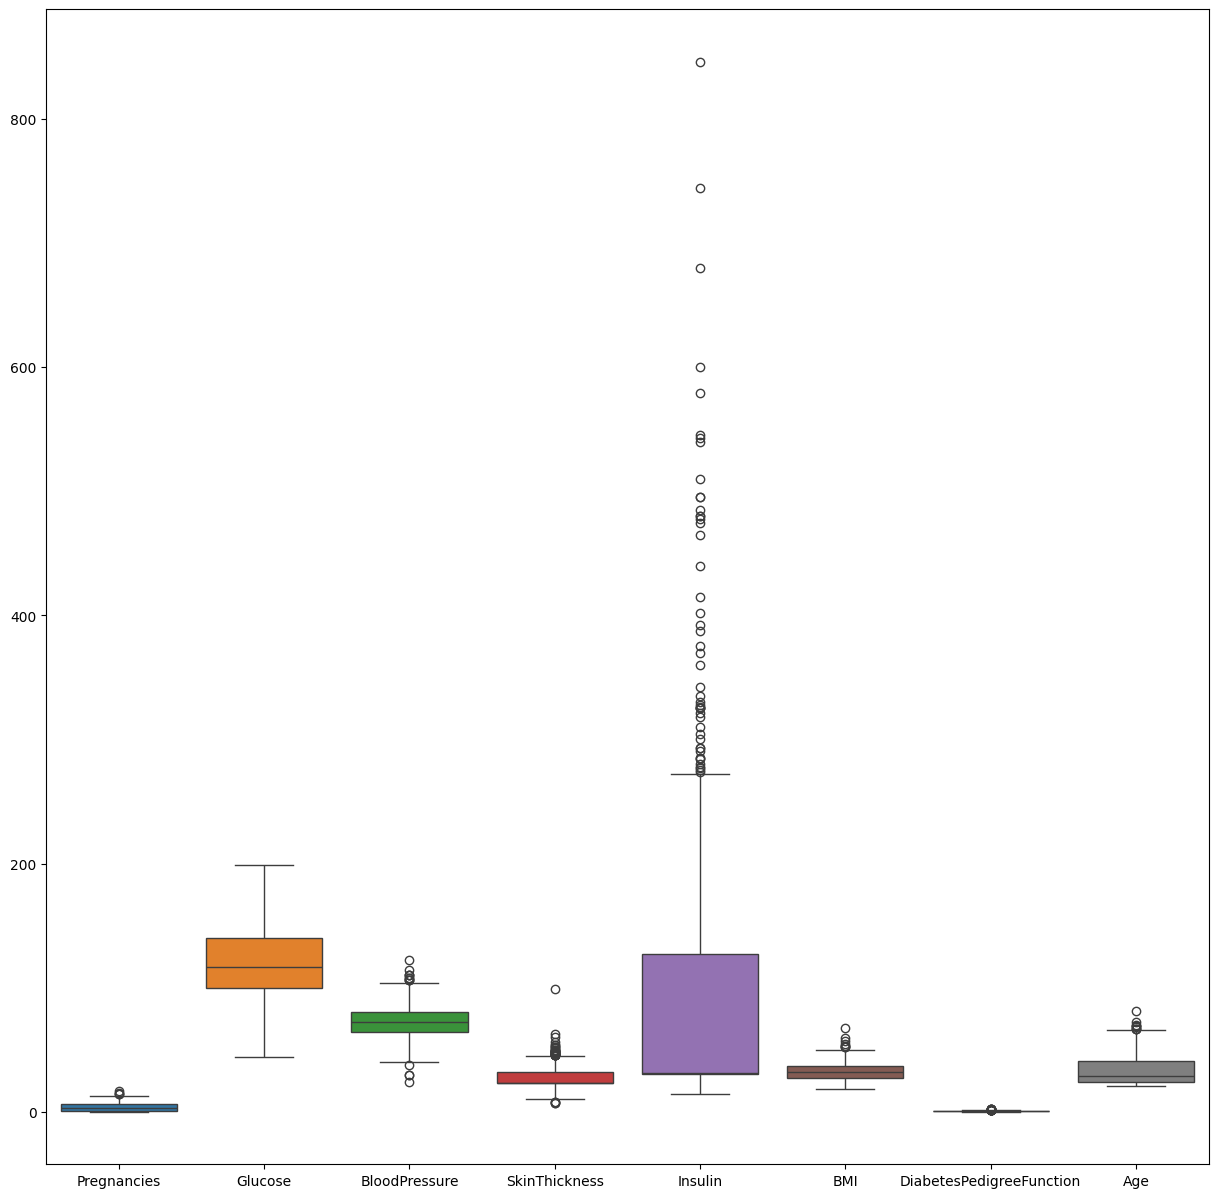

In [98]:
fig,ax=plt.subplots(figsize=(15,15))
sns.boxplot(data=X,ax=ax)

*Insulin has extreme values for outliers which needs to be removed.*

#### Outlier Removal - Quantile Based Appraoch

In [99]:
q=X['Insulin'].quantile(0.95)
mask=X['Insulin']<q
X_outlier_removed=X[mask]
y_outlier_removed=y[mask]

In [100]:
print(X.shape, X_outlier_removed.shape)

(768, 8) (728, 8)


#### Data Splitting into training and testing set

In [102]:
#splitting into training and testing set
X_train,X_test,y_train,y_test=train_test_split(X_outlier_removed,y_outlier_removed,test_size=0.2,random_state=42)

In [103]:
print(X_outlier_removed.shape, X_train.shape, X_test.shape)

(728, 8) (582, 8) (146, 8)


#### Data Resampling -  (SMOTE)
Datset is imbalanced as outcome 0 has high frequency then 1.So, the model may become biased towards majority **class**

In [104]:
y_train.value_counts()

,count
Outcome,
0,381
1,201


###### SMOTE Technique
Generates synthetic examples of the minority class by interpolating between existing instances. It creates new samples that lie between existing minority class samples.

In [105]:
smote=SMOTE()
X_train_resampled,y_train_resampled=smote.fit_resample(X_train,y_train)

In [106]:
y_train_resampled.value_counts()

,count
Outcome,
0,381
1,381


#### Feature Scaling

In [107]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train_resampled)
X_test_scaled=scaler.transform(X_test)

#### Implementing Logistic Regression Model

In [75]:
log_reg_model=LogisticRegression(random_state=42)
log_reg_model.fit(X_train_scaled,y_train_resampled)

LogisticRegression(random_state=42)

In [76]:
y_pred_log=log_reg_model.predict(X_test_scaled)

#### Implementing SVC Model

In [79]:
svc_model = SVC()
svc_model.fit(X_train_scaled,y_train_resampled)

SVC()

In [80]:
y_pred_svc=svc_model.predict(X_test_scaled)

#### Model Evaluation

In [81]:
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_log))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.89      0.74      0.81        96
           1       0.57      0.79      0.66        42

    accuracy                           0.75       138
   macro avg       0.73      0.76      0.73       138
weighted avg       0.79      0.75      0.76       138



In [82]:
print("Classification Report for SVC:")
print(classification_report(y_test, y_pred_svc))

Classification Report for SVC:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80        96
           1       0.56      0.83      0.67        42

    accuracy                           0.75       138
   macro avg       0.73      0.77      0.73       138
weighted avg       0.80      0.75      0.76       138

